## Bibliotecas e DRIVE

In [1]:
!pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tsfel
import pandas as pd
import tsfel.feature_extraction.features as ft

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dados

In [4]:
path = '/content/drive/My Drive/TCC - Desenvolvimento/c1/c_1_001.csv'
cols = ['force_x', 'force_y', 'force_z', 'acc_x', 'acc_y', 'acc_z', 'ae']
df = pd.read_csv(path, header=None, names=cols)
df

,force_x,force_y,force_z,acc_x,acc_y,acc_z,ae
0,0.704,-0.387,-1.084,0.018,0.031,0.027,-0.004
1,0.772,-0.573,-1.153,-0.056,-0.057,-0.058,-0.004
2,0.828,-0.673,-1.242,0.037,0.019,0.031,-0.004
3,0.866,-0.601,-1.311,-0.028,-0.027,-0.022,-0.004
4,0.910,-0.377,-1.341,-0.050,-0.049,-0.058,-0.004
...,...,...,...,...,...,...,...
127394,0.248,0.692,0.531,-0.085,-0.082,-0.071,-0.004
127395,0.245,0.689,0.483,0.184,0.186,0.194,-0.004
127396,0.220,0.630,0.415,0.067,0.066,0.073,-0.004
127397,0.218,0.537,0.346,-0.099,-0.098,-0.087,-0.004


In [5]:
import pandas as pd
import tsfel.feature_extraction.features as ft

# Supondo que df seja seu DataFrame de entrada

# Inicializa um DataFrame vazio para armazenar os resultados
df_features = pd.DataFrame()

# Loop sobre cada coluna para calcular a média
for col in df.columns:

    # Calcula max da coluna e armazena resultado
    max_value = ft.calc_max(df[col])
    new_col_name = f"{col}_max"
    df_features[new_col_name] = [max_value]

    # Calcula min da coluna e armazena resultado
    min_value = ft.calc_min(df[col])
    new_col_name = f"{col}_min"
    df_features[new_col_name] = [min_value]

    # Calcula a média da coluna e armazena resultado
    mean_value = ft.calc_mean(df[col])
    new_col_name = f"{col}_mean"
    df_features[new_col_name] = [mean_value]

    # Calcula std da coluna e armazena resultado
    std_value = ft.calc_std(df[col])
    new_col_name = f"{col}_std"
    df_features[new_col_name] = [std_value]

    # Calcula skewness da coluna e armazena resultado
    skewness_value = ft.skewness(df[col])
    new_col_name = f"{col}_skewness"
    df_features[new_col_name] = [skewness_value]

    # Calcula kurtosis da coluna e armazena resultado
    kurtosis_value = ft.kurtosis(df[col])
    new_col_name = f"{col}_kurtosis"
    df_features[new_col_name] = [kurtosis_value]

    # Calcula RMS para sinais de vibração e emissão acústica
    if col in ['acc_x', 'acc_y', 'acc_z', 'ae']:
      rms_value = ft.rms(df[col])
      new_col_name = f"{col}_rms"
      df_features[new_col_name] = [rms_value]

    #============== frequency features ===================#

    # Calcula spectral centroid
    spectral_centroid = ft.spectral_centroid(df[col], fs=12000)
    new_col_name = f"{col}_spectral_centroid"
    df_features[new_col_name] = [spectral_centroid]

    # Calcula spectral entropy
    spectral_entropy = ft.spectral_entropy(df[col], fs=12000)
    new_col_name = f"{col}_spectral_entropy"
    df_features[new_col_name] = [spectral_entropy]

    # Calcula spectral kurtosis
    spectral_kurtosis = ft.spectral_kurtosis(df[col], fs=12000)
    new_col_name = f"{col}_spectral_kurtosis"
    df_features[new_col_name] = [spectral_kurtosis]

    # Calcula spectral skewness
    spectral_skewness = ft.spectral_skewness(df[col], fs=12000)
    new_col_name = f"{col}_spectral_skewness"
    df_features[new_col_name] = [spectral_skewness]

    #=================== time frequency features ===============#

    # Calcula média absoluta  da wavelet
    if col in ['acc_x', 'acc_y', 'acc_z', 'ae']:

      wavelet_abs_mean = ft.wavelet_abs_mean(df[col], fs=12000, max_width=5)

      # Percorre o dicionário retornado com as frequências e os valores
      for freq, value in zip(wavelet_abs_mean['names'], wavelet_abs_mean['values']):

          # Cria o nome da nova coluna com base na frequência
          new_col_name = f"{col}_wavelet_abs_mean_{freq.replace('Hz', '').strip()}Hz"

          # Adiciona a nova coluna com o respectivo valor
          df_features[new_col_name] = [value]

    # Calcula energia da wavelet
    if col in ['acc_x', 'acc_y', 'acc_z', 'ae']:

      wavelet_energy = ft.wavelet_energy(df[col], fs=12000, max_width=5)

      # Percorre o dicionário retornado com as frequências e os valores
      for freq, value in zip(wavelet_energy['names'], wavelet_energy['values']):

          # Cria o nome da nova coluna com base na frequência
          new_col_name = f"{col}_wavelet_energy_{freq.replace('Hz', '').strip()}Hz"

          # Adiciona a nova coluna com o respectivo valor
          df_features[new_col_name] = [value]

    # Calcula entropia da wavelet
    wavelet_entropy = ft.wavelet_entropy(df[col], fs=12000)
    new_col_name = f"{col}_wavelet_entropy"
    df_features[new_col_name] = [wavelet_entropy]

# Mostra o DataFrame com as features calculadas
df_features
df_features_2= df_features
df_features_2


<ipython-input-5-c1f758a510de>:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features[new_col_name] = [spectral_centroid]
<ipython-input-5-c1f758a510de>:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features[new_col_name] = [spectral_entropy]
<ipython-input-5-c1f758a510de>:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

,force_x_max,force_x_min,force_x_mean,force_x_std,force_x_skewness,force_x_kurtosis,force_x_spectral_centroid,force_x_spectral_entropy,force_x_spectral_kurtosis,force_x_spectral_skewness,...,ae_spectral_skewness,ae_wavelet_abs_mean_3000.0Hz,ae_wavelet_abs_mean_1500.0Hz,ae_wavelet_abs_mean_1000.0Hz,ae_wavelet_abs_mean_750.0Hz,ae_wavelet_energy_3000.0Hz,ae_wavelet_energy_1500.0Hz,ae_wavelet_energy_1000.0Hz,ae_wavelet_energy_750.0Hz,ae_wavelet_entropy
0,3.744,-2.501,0.400857,0.842468,0.115205,-0.245189,524.950361,0.401297,15.514857,3.481441,...,0.664791,4.960675e-08,1.516954e-07,2.849132e-07,4.405736e-07,0.000245,0.000274,0.000288,0.000345,2.074924


In [6]:
import pandas as pd
import tsfel.feature_extraction.features as ft

# Inicializa uma lista de dicionários para armazenar os resultados das features
features_list = []

# Loop sobre cada coluna para calcular as features
for col in df.columns:
    # Inicializa um dicionário temporário para armazenar as features da coluna atual
    temp_features = {}

    # Calcula max da coluna e armazena no dicionário
    temp_features[f"{col}_max"] = ft.calc_max(df[col])

    # Calcula min da coluna e armazena no dicionário
    temp_features[f"{col}_min"] = ft.calc_min(df[col])

    # Calcula a média da coluna e armazena no dicionário
    temp_features[f"{col}_mean"] = ft.calc_mean(df[col])

    # Calcula std da coluna e armazena no dicionário
    temp_features[f"{col}_std"] = ft.calc_std(df[col])

    # Calcula skewness da coluna e armazena no dicionário
    temp_features[f"{col}_skewness"] = ft.skewness(df[col])

    # Calcula kurtosis da coluna e armazena no dicionário
    temp_features[f"{col}_kurtosis"] = ft.kurtosis(df[col])

    # Calcula RMS para sinais de vibração e emissão acústica
    if col in ['acc_x', 'acc_y', 'acc_z', 'ae']:
        temp_features[f"{col}_rms"] = ft.rms(df[col])

    # ============== frequency features =================== #

    # Calcula spectral centroid
    temp_features[f"{col}_spectral_centroid"] = ft.spectral_centroid(df[col], fs=12000)

    # Calcula spectral entropy
    temp_features[f"{col}_spectral_entropy"] = ft.spectral_entropy(df[col], fs=12000)

    # Calcula spectral kurtosis
    temp_features[f"{col}_spectral_kurtosis"] = ft.spectral_kurtosis(df[col], fs=12000)

    # Calcula spectral skewness
    temp_features[f"{col}_spectral_skewness"] = ft.spectral_skewness(df[col], fs=12000)

    # ============ time frequency features ============= #

    # Calcula média absoluta da wavelet
    if col in ['acc_x', 'acc_y', 'acc_z', 'ae']:
        wavelet_abs_mean = ft.wavelet_abs_mean(df[col], fs=12000, max_width=5)
        for freq, value in zip(wavelet_abs_mean['names'], wavelet_abs_mean['values']):
            temp_features[f"{col}_wavelet_abs_mean_{freq.replace('Hz', '').strip()}Hz"] = value

        # Calcula energia da wavelet
        wavelet_energy = ft.wavelet_energy(df[col], fs=12000, max_width=5)
        for freq, value in zip(wavelet_energy['names'], wavelet_energy['values']):
            temp_features[f"{col}_wavelet_energy_{freq.replace('Hz', '').strip()}Hz"] = value

    # Calcula entropia da wavelet
    temp_features[f"{col}_wavelet_entropy"] = ft.wavelet_entropy(df[col], fs=12000)

    # Adiciona o dicionário de features para essa coluna na lista de features
    features_list.append(temp_features)

# Concatena todos os dicionários da lista em um DataFrame final de features
df_features = pd.concat([pd.DataFrame([features]) for features in features_list], axis=1) #.T.reset_index(drop=True)

# Mostra o DataFrame com as features calculadas
df_features


,force_x_max,force_x_min,force_x_mean,force_x_std,force_x_skewness,force_x_kurtosis,force_x_spectral_centroid,force_x_spectral_entropy,force_x_spectral_kurtosis,force_x_spectral_skewness,...,ae_spectral_skewness,ae_wavelet_abs_mean_3000.0Hz,ae_wavelet_abs_mean_1500.0Hz,ae_wavelet_abs_mean_1000.0Hz,ae_wavelet_abs_mean_750.0Hz,ae_wavelet_energy_3000.0Hz,ae_wavelet_energy_1500.0Hz,ae_wavelet_energy_1000.0Hz,ae_wavelet_energy_750.0Hz,ae_wavelet_entropy
0,3.744,-2.501,0.400857,0.842468,0.115205,-0.245189,524.950361,0.401297,15.514857,3.481441,...,0.664791,4.960675e-08,1.516954e-07,2.849132e-07,4.405736e-07,0.000245,0.000274,0.000288,0.000345,2.074924


## Aplicação final

In [7]:
def extract_features(tool, cut_index):

  '''Extract temporal and time-frequency features from a time series.

    Parameters
    -----------
    Single cut index of a tool -> int

    Returns
    -----------
    Single row dataframe of calculated features -> DataFrame

    Temporal features:
    ------------------
      - max
      - min
      - mean
      - std dev
      - skewness
      - kurtosis
      - RMS for vibration and acoustic features
      - difference between subsequent cut means

    Frequency features:
    -------------------
      - spectral centroid
      - spectral entropy
      - spectral kurtosis
      - spectral skewness

    Time-frequency features:
    -----------------------
      - wavelet abs mean for acceleration and acoustic emission
      - wavelet energy for acceleration and acoustic emission
      - wavelet entropy for acceleration and acoustic emission
    '''

  # Carregar os dados correspondentes ao par (ferramenta, corte)
  path = f'/content/drive/My Drive/TCC - Desenvolvimento/c{tool}/c_{tool}_{cut_index:03d}.csv'
  cols = ['force_x', 'force_y', 'force_z', 'acc_x', 'acc_y', 'acc_z', 'ae']
  df = pd.read_csv(path, header=None, names=cols)

  # Inicializa uma lista de dicionários para armazenar os resultados das features
  features_list = []

  # Loop sobre cada coluna para calcular as features
  for col in df.columns:

    # Inicializa um dicionário temporário para armazenar as features da coluna atual
    temp_features = {}

    # Calcula max da coluna e armazena no dicionário
    temp_features[f"{col}_max"] = ft.calc_max(df[col])

    # Calcula min da coluna e armazena no dicionário
    temp_features[f"{col}_min"] = ft.calc_min(df[col])

    # Calcula a média da coluna e armazena no dicionário
    temp_features[f"{col}_mean"] = ft.calc_mean(df[col])

    # Calcula std da coluna e armazena no dicionário
    temp_features[f"{col}_std"] = ft.calc_std(df[col])

    # Calcula skewness da coluna e armazena no dicionário
    temp_features[f"{col}_skewness"] = ft.skewness(df[col])

    # Calcula kurtosis da coluna e armazena no dicionário
    temp_features[f"{col}_kurtosis"] = ft.kurtosis(df[col])

    # Calcula RMS para sinais de vibração e emissão acústica
    if col in ['acc_x', 'acc_y', 'acc_z', 'ae']:
      temp_features[f"{col}_rms"] = ft.rms(df[col])

    # ============== frequency features =================== #

    # Calcula spectral centroid
    temp_features[f"{col}_spectral_centroid"] = ft.spectral_centroid(df[col], fs=12000)

    # Calcula spectral entropy
    temp_features[f"{col}_spectral_entropy"] = ft.spectral_entropy(df[col], fs=12000)

    # Calcula spectral kurtosis
    temp_features[f"{col}_spectral_kurtosis"] = ft.spectral_kurtosis(df[col], fs=12000)

    # Calcula spectral skewness
    temp_features[f"{col}_spectral_skewness"] = ft.spectral_skewness(df[col], fs=12000)

    # ============ time frequency features ============= #

    if col in ['acc_x', 'acc_y', 'acc_z', 'ae']:

      # Calcula média absoluta da wavelet
      wavelet_abs_mean = ft.wavelet_abs_mean(df[col], fs=12000, max_width=13)
      for freq, value in zip(wavelet_abs_mean['names'], wavelet_abs_mean['values']):
        temp_features[f"{col}_wavelet_abs_mean_{freq.replace('Hz', '').strip()}Hz"] = value

      # Calcula energia da wavelet
      wavelet_energy = ft.wavelet_energy(df[col], fs=12000, max_width=13)
      for freq, value in zip(wavelet_energy['names'], wavelet_energy['values']):
        temp_features[f"{col}_wavelet_energy_{freq.replace('Hz', '').strip()}Hz"] = value

      # Calcula entropia da wavelet
      temp_features[f"{col}_wavelet_entropy"] = ft.wavelet_entropy(df[col], fs=12000)

    # Adiciona o dicionário de features para essa coluna na lista de features
    features_list.append(temp_features)

  # Concatena todos os dicionários da lista em um DataFrame final de features
  df_features = pd.concat([pd.DataFrame([features]) for features in features_list], axis=1) #.T.reset_index(drop=True)
  df_features.insert(0, 'tool', tool)
  df_features.insert(1, 'cut_index', cut_index)

  return df_features

In [8]:
extract_features(1,1)

,tool,cut_index,force_x_max,force_x_min,force_x_mean,force_x_std,force_x_skewness,force_x_kurtosis,force_x_spectral_centroid,force_x_spectral_entropy,...,ae_wavelet_energy_750.0Hz,ae_wavelet_energy_600.0Hz,ae_wavelet_energy_500.0Hz,ae_wavelet_energy_428.57Hz,ae_wavelet_energy_375.0Hz,ae_wavelet_energy_333.33Hz,ae_wavelet_energy_300.0Hz,ae_wavelet_energy_272.73Hz,ae_wavelet_energy_250.0Hz,ae_wavelet_entropy
0,1,1,3.744,-2.501,0.400857,0.842468,0.115205,-0.245189,524.950361,0.401297,...,0.000345,0.000419,0.000504,0.0006,0.000704,0.00082,0.000944,0.001078,0.001221,2.074924


In [ ]:
# Aplicação da função em todo o dataset de treino

raw_featured_dataset = pd.DataFrame()
for tool in [1,4]:
  for cut_index in range(1, 316):
    df_features = extract_features(tool, cut_index)
    raw_featured_dataset = pd.concat([raw_featured_dataset, df_features], axis=0)
# raw_featured_dataset

# Salvar o featured dataset em um novo arquivo .csv para evitar recálculo
raw_featured_dataset.to_csv('/content/drive/My Drive/TCC - Desenvolvimento/raw_featured_dataset.csv', sep=',', index=False, header=True)
#raw_featured_dataset.head()

## Aplicação Test Dataset

In [9]:
# Aplicação da função em todo o dataset de treino

raw_featured_dataset = pd.DataFrame()
for tool in [6]:
  for cut_index in range(1, 316):
    df_features = extract_features(tool, cut_index)
    raw_featured_dataset = pd.concat([raw_featured_dataset, df_features], axis=0)
# raw_featured_dataset

# Salvar o featured dataset em um novo arquivo .csv para evitar recálculo
raw_featured_dataset.to_csv('/content/drive/My Drive/TCC - Desenvolvimento/raw_x_test.csv', sep=',', index=False, header=True)
#raw_featured_dataset.head()

## Rascunho



In [ ]:
# Calcula média absoluta da wavelet
wavelet_abs_mean = ft.wavelet_abs_mean(df[col], fs=12000, max_width=13)
wavelet_abs_mean

{'names': ['3000.0Hz',
  '1500.0Hz',
  '1000.0Hz',
  '750.0Hz',
  '600.0Hz',
  '500.0Hz',
  '428.57Hz',
  '375.0Hz',
  '333.33Hz',
  '300.0Hz',
  '272.73Hz',
  '250.0Hz'],
 'values': array([4.96067475e-08, 1.51695363e-07, 2.84913196e-07, 4.40573617e-07,
        6.15159908e-07, 8.04750088e-07, 1.01054312e-06, 1.22997899e-06,
        1.46479923e-06, 1.71210000e-06, 1.97112841e-06, 2.23965288e-06])}

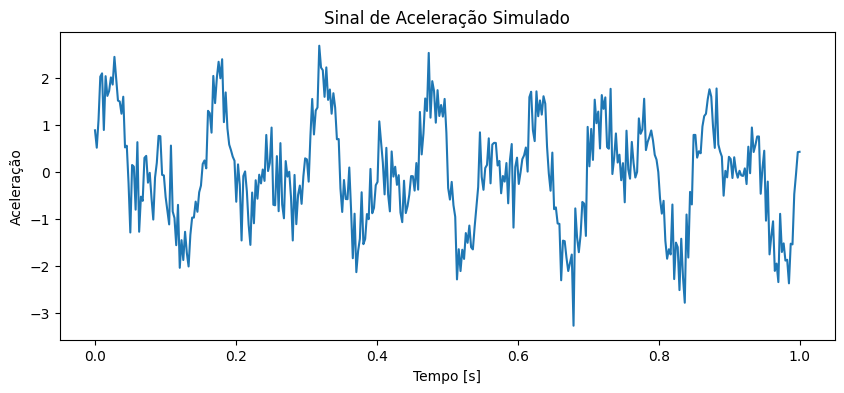

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simular uma série temporal de aceleração
np.random.seed(0)
time = np.linspace(0, 1, 400)
# Sinal simulado com duas frequências + ruído
signal = np.sin(2 * np.pi * 7 * time) + np.sin(2 * np.pi * 13 * time) + 0.5 * np.random.randn(len(time))

# Plotar o sinal original
plt.figure(figsize=(10, 4))
plt.plot(time, signal)
plt.title("Sinal de Aceleração Simulado")
plt.xlabel("Tempo [s]")
plt.ylabel("Aceleração")
plt.show()


In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.4 MB/s eta 0:00:00


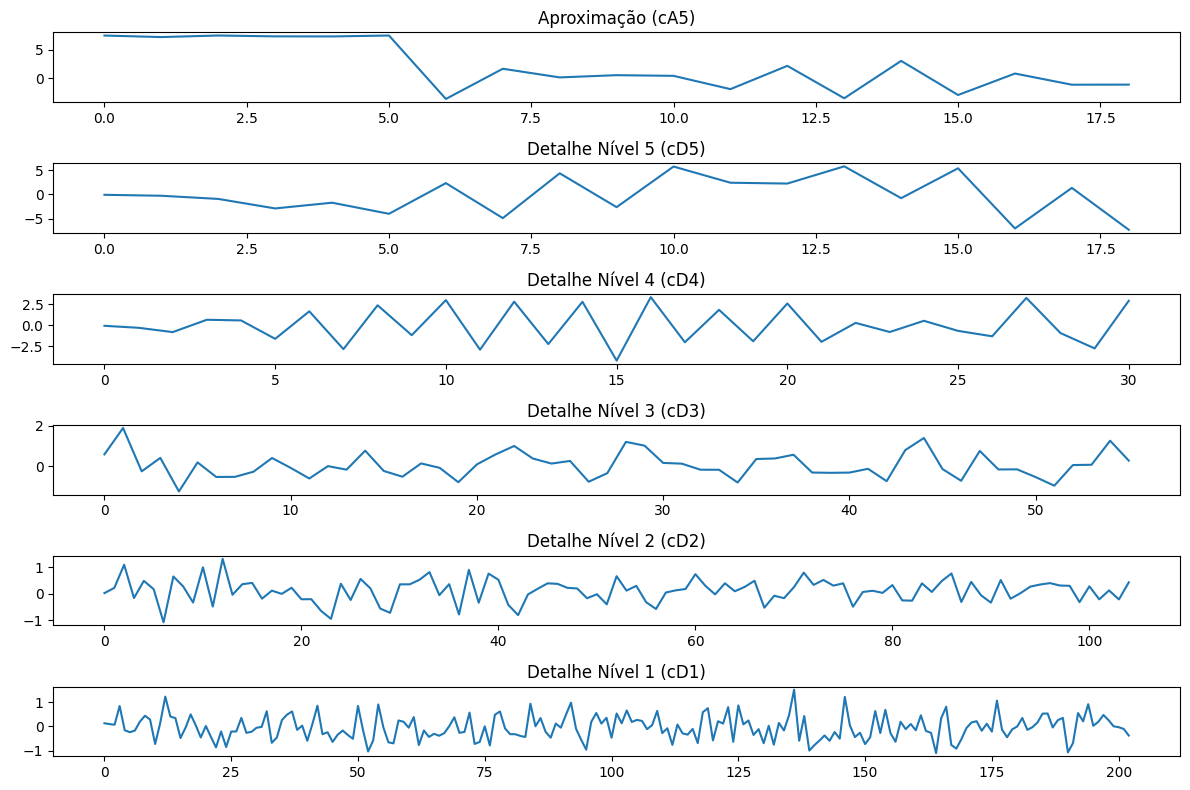

In [ ]:
import pywt

# Aplicando a transformada wavelet discreta (usando a wavelet 'db4' e 5 níveis de decomposição)
wavelet = 'db4'
coeffs = pywt.wavedec(signal, wavelet, level=5)

# Coeficientes DWT: detalhamento e aproximação em cada nível
cA5, cD5, cD4, cD3, cD2, cD1 = coeffs

# Plotar os coeficientes de detalhe e aproximação
plt.figure(figsize=(12, 8))

plt.subplot(6, 1, 1)
plt.plot(cA5)
plt.title("Aproximação (cA5)")

plt.subplot(6, 1, 2)
plt.plot(cD5)
plt.title("Detalhe Nível 5 (cD5)")

plt.subplot(6, 1, 3)
plt.plot(cD4)
plt.title("Detalhe Nível 4 (cD4)")

plt.subplot(6, 1, 4)
plt.plot(cD3)
plt.title("Detalhe Nível 3 (cD3)")

plt.subplot(6, 1, 5)
plt.plot(cD2)
plt.title("Detalhe Nível 2 (cD2)")

plt.subplot(6, 1, 6)
plt.plot(cD1)
plt.title("Detalhe Nível 1 (cD1)")

plt.tight_layout()
plt.show()


In [ ]:
cD4.shape

(31,)